<a href="https://colab.research.google.com/github/mashrur-rahman-fahim/Machine_learning_projects/blob/main/imageCompression_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [45]:
def find_closest_centroids(x,centroids):
  idx=np.zeros(x.shape[0],dtype=int)
  for i in range(x.shape[0]):
    min_dist=[]
    for j in range(centroids.shape[0]):
      min_dist.append(np.linalg.norm(x[i]-centroids[j]))
    idx[i]=np.argmin(min_dist)
  return idx


In [46]:
x=np.load('data.npy')
x.shape
initial_centroids = np.array([[3,3], [6,2], [8,5]])
idx = find_closest_centroids(x, initial_centroids)
print(idx[:5],idx.shape)


[0 2 1 0 0] (300,)


In [47]:
def compute_centroid(x,idx,k):
  centroids=np.zeros((k,x.shape[1]))
  for i in range(k):
    centroids[i]=np.mean(x[idx==i],axis=0)
  return centroids

In [48]:
K = 3
centroids = compute_centroid(x, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [49]:
def kmean_init(x,k):
  randidx=np.random.permutation(x.shape[0])
  centroids=x[randidx[:k]]
  return centroids

In [50]:
def run_kmeans(x,init_centroid,max_it=10):
  k=init_centroid.shape[0]
  for i in range(max_it):
    idx=find_closest_centroids(x,init_centroid)
    centroids=compute_centroid(x,idx,k)
  return idx,centroids

(16384, 3)

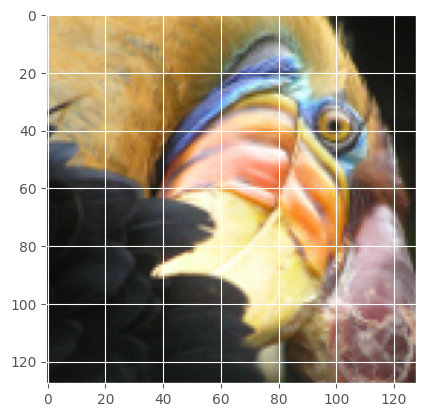

In [51]:
original_img=plt.imread('bird_small.png')
plt.imshow(original_img)
ximg=np.reshape(original_img,(original_img.shape[0]*original_img.shape[1],3))
ximg.shape

In [56]:
k=16
init_centroids=kmean_init(ximg,k)
idx,centroids=run_kmeans(ximg,init_centroids,30)
print(idx[:5])


[5 5 5 5 5]


[5 5 5 5 5] (16, 3)
(128, 128, 3)


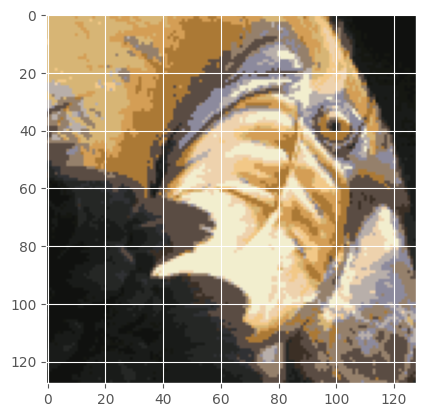

In [57]:

print(idx[:5],centroids.shape)
xrec=centroids[idx,:]
x_rec=np.reshape(xrec,original_img.shape)
print(x_rec.shape)
plt.imshow(x_rec)
